In [1]:
import matplotlib.pyplot as plt

## 3.2 활성화 함수

### 3.2.0 도입

활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 **계단함수**라 한다.

- 퍼셉트론에서 활성화 함수로 계단함수를 이용한다.
- 계단함수 이외의 함수를 퍼센트론에 사용해도 된다.

### 3.2.1 시그모이드 함수

- exp(-x) = e^(-x)
- e는 자연상수로 2.7182... 값을 갖는 상수
- 신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환, 그 변환된 신호를 다음 뉴런에게 전달한다.

### 3.2.2 계단 함수 구현

- 입력이 0을 넘기면 1을 출력
- 이외에는 0을 출력

In [2]:
def step_function(x):
    return 1 if x > 0 else 0

- 위와 같은 함수로 구현한 결과의 문제점은 인수 x를 실수만 받아들인다는 것이다.
- 실수인수를 넣을 수는 있지만 **넘파이 배열은 넣을 수 없다.**

넘파이 배열도 사용가능하게 구현하자.

1. numpy 배열에 부등호 연산을 수행하면 각각 부등호 연산을 수행한 bool 배열이 생성된다.
2. 그 값을 별도로 저장한다.
3. bool type을 int형으로 변경해준다.
    - 넘파이 자료형의 데이터를 변환할 때는 astype()메서드를 이용한다.
    - 원하는 자료형을 인수로 지정하면 된다. (예) np.int, np.str ...

In [5]:
import numpy as np
xdata = np.array([-1.0, 1.0, -2.0, 0.5])
ydata = xdata > 0
print(ydata)
print(type(ydata))
print(ydata.astype(np.int))
type(ydata.astype(np.int)[0])

[False  True False  True]
<class 'numpy.ndarray'>
[0 1 0 1]


numpy.int32

In [6]:
import numpy as np
def step_function_1(x):
    y = x > 0
    return y.astype(np.int)

In [7]:
xdata = np.array([-1.0, 1.0, -2.0, 0.5])
ydata = step_function_1(xdata)

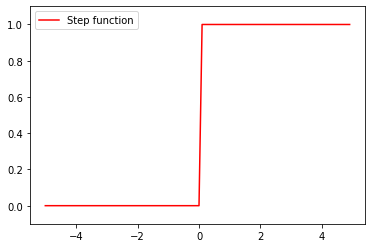

In [17]:
xdata = np.arange(-5.0, 5.0, 0.1)
ydata = step_function_1(xdata)
plt.plot(xdata, ydata, label='Step function', color='red')
plt.legend()
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 시그모이드 함수 구현

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # 브로드캐스트 기능을 이용해 모두에게 적용

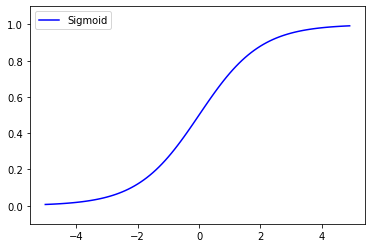

In [18]:
xdata = np.arange(-5.0, 5.0, 0.1)
ydata = sigmoid(xdata)
plt.plot(xdata, ydata, label='Sigmoid', color='blue')
plt.legend()
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교

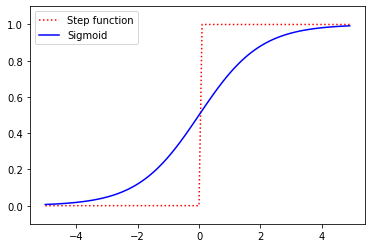

In [21]:
xdata = np.arange(-5.0, 5.0, 0.1)
y_step = step_function_1(xdata)
y_sig = sigmoid(xdata)

line1 = plt.plot(xdata, y_step, label='Step function', color='red', linestyle=':')
line2 = plt.plot(xdata, y_sig, label='Sigmoid', color='blue')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

- 가장 직관적인 차이는 **매끄러움**의 차이
    - 시그모이드 함수는 부드러운 곡선이며, 입력에 따라 출력이 연속적으로 변경된다.
    - 계단 함수는 0을 경계로 출력이 갑자기 바뀌어버린다.   

- 시그모이드 함수의 매끈함이 신경망 학습에 중요한 역할을 차지하고 있다.
    - 퍼셉트론(계단함수) : 0 혹은 1이 흐른다.
    - 신경망(시그모이드함수) : 연속적인 실수   
    
- 하지만 둘 다 입력이 아무리 작거나 커도 출력은 0에서 1사이
- 둘 다 **비선형함수**이다.

### 3.2.6 비선형 함수

시그모이드 함수는 곡선, 계단 함수는 계단처럼 구부러진 직선으로 나타내며, 동시에 비선형 함수로 분류된다.
    - 선형함수는 무언가 입력했을 때 출력이 입력의 상수배만큼 변하는 함수이다.
    - f(x) = ax + b인 1개의 곧은 직선이 되는 함수이다.
**신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다.**   
그 이유는 선형함수를 이용하면 신경망의 층을 깊게하는 의미가 없어지기 때문이다.
- 선형함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다.
- 예
    - h(x) = cx 를 활성화 함수로 사용한 3층 네트워크를 떠올려 보자.
    - 결과는 y(x) = h(h(h(x))) = c * c * c * x일 뿐이다.
    - 이는 y(x) = c^3 * x와 다를게 없는 결과이므로 은닉층이 없는 네트워크로 표현할 수 있다.

### 3.2.7 ReLU 함수

시그모이드 함수를 이용해 신경망을 구성했지만 최근에는 ReLU(Rectified Linear Unit) 함수를 주로 이용한다.
- ReLU 함수는 입력이 0을 넘으면 그 입력을 그대로 출력
- 0 이하면 0을 출력하는 함수

In [23]:
def relu(x):
    return np.maximum(0, x)

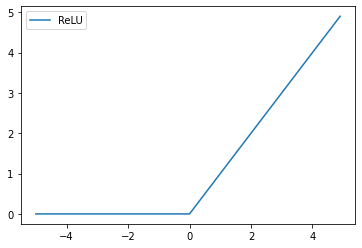

In [24]:
xdata = np.arange(-5.0, 5.0, 0.1)
ydata = relu(xdata)
plt.plot(xdata, ydata, label='ReLU')
plt.legend()
plt.show()

## 3.3 다차원 배열의 계산
- 넘파이의 다차원 배열을 사용한 계산을 숙달하여 신경망을 효율적으로 구현해보자.

### 3.3.3 다차원 배열
- np.ndim() 함수를 통해 배열의 차원을 확인할 수 있다.
- 배열의 형상은 인스턴스 변수인 shape로 알 수 있다.
- A.shape은 튜플을 반환한다.

In [25]:
a = np.array([1, 2, 3])
print(a)

[1 2 3]


In [26]:
type(a)

numpy.ndarray

In [28]:
a.shape

(3,)

In [32]:
b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

In [33]:
b.shape

(4, 3)

In [34]:
c = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]])

In [35]:
c.shape

(2, 4, 3)

In [36]:
np.ndim(c)

3

In [37]:
np.ndim(b)

2

In [39]:
c

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]],

       [[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]]])

### 3.3.2 행렬의 곱
행렬의 곱(벡터의 내적)을 나타내는 연산은 np.dot() 함수이다.

In [40]:
A_1 = np.array([[1, 2], [3, 4]])
B_1 = np.array([[5, 6], [7, 8]])
np.dot(A_1, B_1)

array([[19, 22],
       [43, 50]])

In [41]:
A_2 = np.array([1, 2])
B_2 = np.array([5, 6])
np.dot(A_2, B_2)

17

In [42]:
A_3 = np.array([[1, 2, 3], [4, 5, 6]])
B_3 = np.array([[1, 2], [3, 4], [5, 6]])
np.dot(A_3, B_3)

array([[22, 28],
       [49, 64]])

- 다차원 배열을 곱하려면 두 행렬의 대응하는 차원의 원소 수를 일치시켜야 한다.   
예) 3x2 행렬 * 2x4 행렬   
- A는 2차원 행렬 B가 1차원 배열일 때도 '대응하는 차원의 원소수를 일치' 시켜야 한다.   
예) 3x2 행렬 * 1차원(2,) 행렬

In [43]:
A_4 = np.array([[1, 2], [3, 4], [5, 6]])
B_4 = np.array([7, 8])
np.dot(A_4, B_4)

array([23, 53, 83])

In [44]:
A_5 = np.array([[1, 2], [3, 4], [5, 6]])
B_5 = np.array([[7], [8]])
np.dot(A_5, B_5)

array([[23],
       [53],
       [83]])

### 3.3.3 신경망에서의 행렬 곱

In [45]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
np.dot(X, W)

array([ 5, 11, 17])